In [2]:
import os
#Añadimos la gráfica que va a usar CUDA al entorno.
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
import torchvision
import torchvision.transforms as transforms
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *

from torch.autograd import Variable



In [3]:
def es_correcta(imagen) : return imagen[0].isupper()

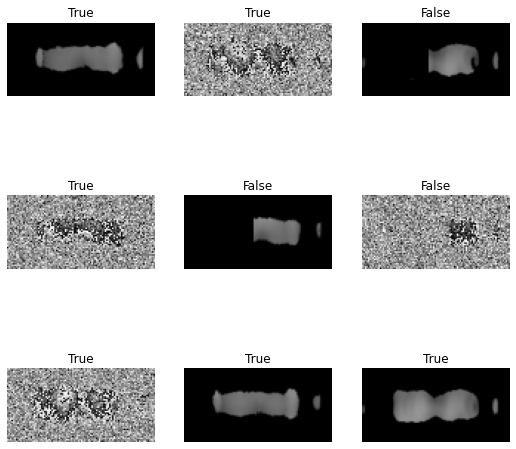

In [4]:
path = Path('./DatasetSoldadurasJuntas/')
#path.ls()
#files = get_image_files(path)
#print(len(files))
#cwd = os.getcwd()
#print(cwd)
#dls = ImageDataLoaders.from_folder(path, valid_pct=0.2 , bs=9)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, bs=10, seed=42,
    label_func=es_correcta
)
dls.show_batch()


epoch,train_loss,valid_loss,accuracy,time
0,0.765888,0.326539,0.873333,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.418061,0.112486,0.966667,00:50


SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=6.309573450380412e-07)

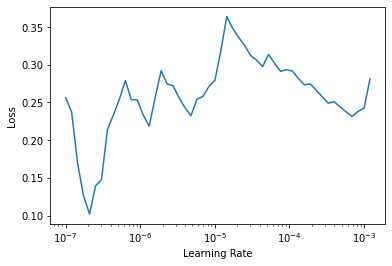

In [5]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)
learn.lr_find()

In [ ]:
learn.lr_find()

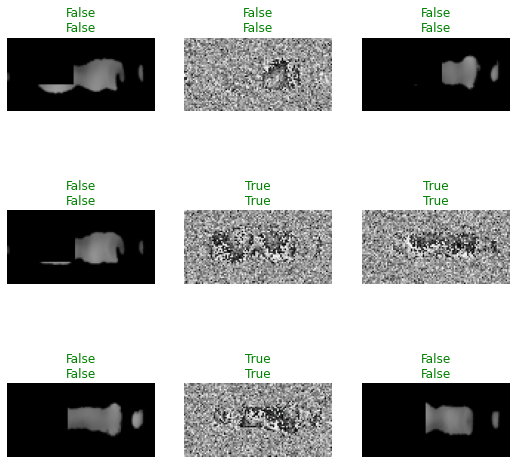

In [6]:
learn.show_results()

In [2]:
img = PILImage.create('./DatasetSoldadurasJuntas/Pieza_10_Soldadura_77.png')
x, = first(dls.test_dl([img]))
img.show(figsize=(10,5))
class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
        
hook_output = Hook()
hook = learn.model[0].register_forward_hook(hook_output.hook_func)
with torch.no_grad(): output = learn.model.eval()(x)
act = hook_output.stored[0]

F.softmax(output, dim=-1)

dls.vocab

x.shape

cam_map = torch.einsum('ck,kij->cij', learn.model[1][-1].weight, act)
print(cam_map.shape)

x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map[1].detach().cpu(), alpha=0.6, extent=(0,100,50,0),
    interpolation='bilinear', cmap='magma')



NameError: name 'PILImage' is not defined

In [ ]:
transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

path = './DatasetSoldadurasFinal/'

trainset = torchvision.datasets.ImageFolder(root = path,
                                           transform = transform)
train_loader = torch.utils.data.DataLoader(trainset , batch_size = 4,
                                            shuffle = True,
                                            drop_last = False,
                                            num_workers = 2)

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def gaussian(ins, is_training, mean, stddev):
    if is_training:
        noise = Variable(ins.data.new(ins.size()).normal_(mean, stddev))
        return ins + noise
    return ins

pil_img = Image.open('./DatasetSoldaduras/NFD1/Pieza_15_Soldadura_77.png')
#pil_img = Image.open('./DatasetSoldaduras/NFD1/download.jpg').convert('RGB')
trans_T = transforms.ToTensor()
trans_S = transforms.Resize((200,1000))
trans_P = transforms.ToPILImage()
#trans_P(trans_S(trans_T(pil_img))).show()

transform=transforms.Compose([
    #transforms.Resize((50,150)),
    transforms.ToTensor(),
    #transforms.Normalize((0.1,), (0.3,)),
    AddGaussianNoise(0.3 , 0.04 )
    #AddGaussianNoise(0 , 1 )
])

pil_img = gaussian(trans_T(pil_img), True, 0.3, 0.04)
#print(pil_img)
pil_img = trans_P(pil_img)
pil_img.show()
#pil_img = trans_P(transform(pil_img))

#pil_img = trans_S(pil_img)
print(pil_img)
#display(pil_img)
pil_img.show()


#img = cv2.imread('./DatasetSoldaduras/NFD1/Pieza_15_Soldadura_77.png')
#blur = cv2.GaussianBlur(img, (5,5), 0)
#plt.imshow(blur)
#cv2.imwrite('Gauss.png',blur)



In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))